# Полиномиальные модели
Цель работы
На практике познакомиться с моделями полиномиальной регрессии и классификации, понять влияние степени полинома на вычислительную сложность и точность модели.

Содержание работы
Загрузите учебный набор данных для регрессии "gen_regression".
Постройте модель парной линейной регрессии, оцените ее эффективность, изобразите модель на графике.
Постройте модель полиномиальной регрессии второго порядка. Сравните ее эффективность с первой моделью.
Загрузите набор данных для классификации "gen_classification".
Постройте линейную классификацию, изобразите ее на графике и оцените точность.
Введите в данные признаки третьего порядка и постройте классификацию. Сравните с предыдущей моделью.
Загрузите набор данных, содержащий данные о продаже домов в округе King county, США.
Постройте на этом датасете линейную модель и полиномиальную второго порядка. Изобразите на графике и сравните эффективность.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")

In [30]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [31]:
X = data.x
y = data.y

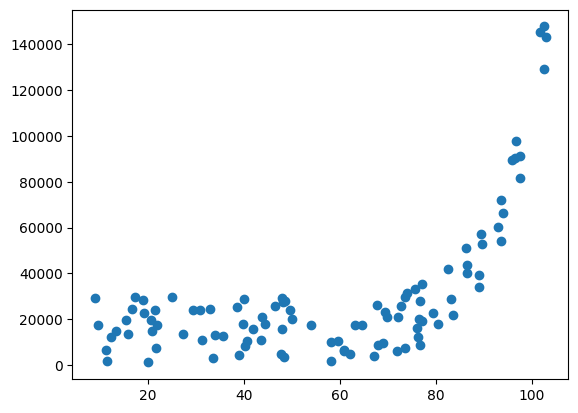

In [32]:
plt.scatter(X, y)

In [35]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, y)

LinearRegression()

In [36]:
X = pd.DataFrame(X)

c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


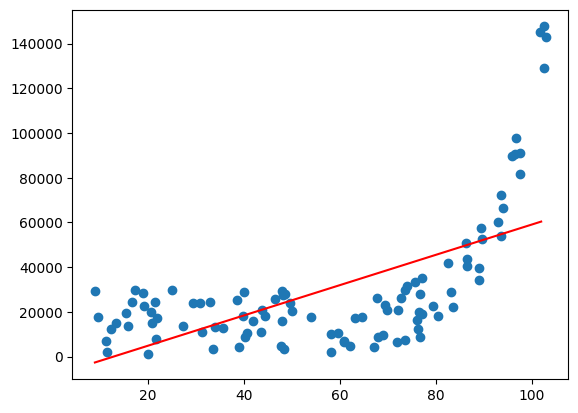

In [37]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [38]:
linear.score(X, y)

0.37467360318911636

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
transformation = PolynomialFeatures(degree=2)

In [41]:
transformation.fit(X)

PolynomialFeatures()

In [42]:
X_2 = transformation.transform(X)

In [43]:
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [44]:
poly_2d = LinearRegression().fit(X_2, y)

In [45]:
xx_2d = transformation.transform(pd.DataFrame(xx))

c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


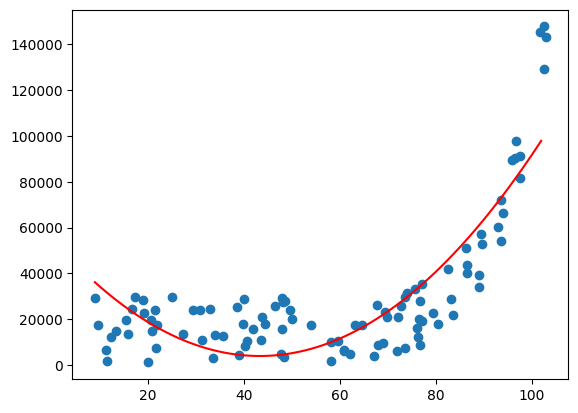

In [46]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [47]:
poly_2d.score(X_2, y)

0.7359753787024842

In [48]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [49]:
y = data.y
X = data.drop(["y"], axis=1)

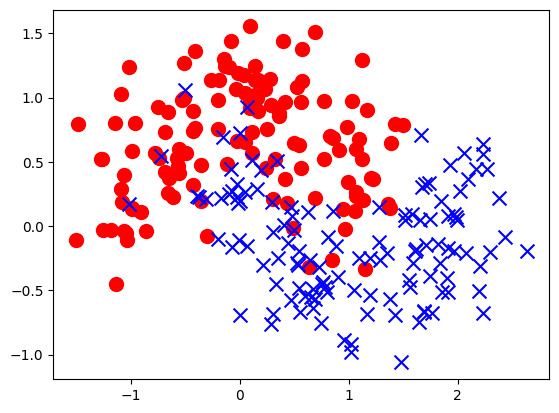

In [50]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logistic = LogisticRegression().fit(X, y)

C:\Users\alesh\AppData\Local\Temp\ipykernel_7984\739733186.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\alesh\AppData\Local\Temp\ipykernel_7984\739733186.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


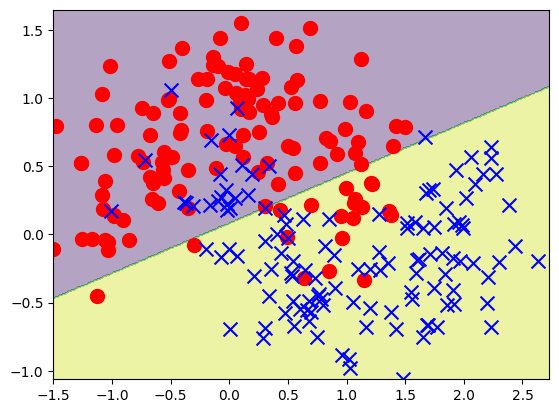

In [53]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [54]:
logistic.score(X, y)

0.832

In [55]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [56]:
X_3.shape

(250, 9)

In [57]:
class_3 = LogisticRegression().fit(X_3, y)

c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


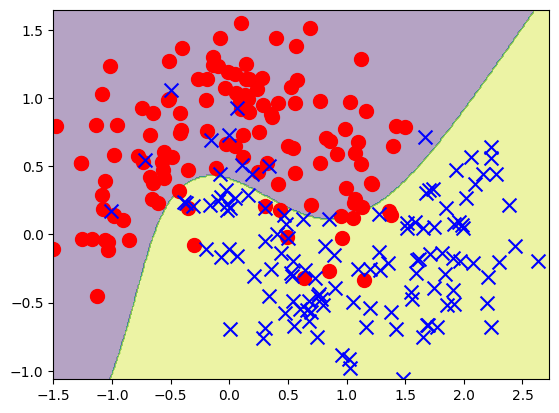

In [58]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [59]:
class_3.score(X_3, y)

0.9

In [60]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [61]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [63]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [64]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109155

In [65]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [66]:
X_3_kc_prices.shape

(21613, 1330)

In [67]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8645897918887684

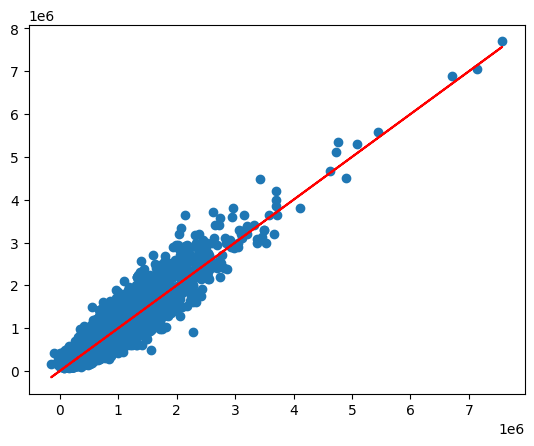

In [68]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

# Задания для самостоятельного выполнения

В выполненной работе добавьте замер времени обучения каждой модели.

In [69]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для регрессии
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")
X = data.x
y = data.y

# Модель линейной регрессии
linear = LinearRegression()

# Замер времени для линейной регрессии
start_time = time.time()
linear.fit(X.values.reshape(-1, 1), y)
linear_time = time.time() - start_time
print(f"Время обучения линейной регрессии: {linear_time:.4f} секунд")

# Модель полиномиальной регрессии второго порядка
transformation = PolynomialFeatures(degree=2)
X_2 = transformation.fit_transform(X.values.reshape(-1, 1))

# Замер времени для полиномиальной регрессии второго порядка
start_time = time.time()
poly_2d = LinearRegression().fit(X_2, y)
poly_2d_time = time.time() - start_time
print(f"Время обучения полиномиальной регрессии второго порядка: {poly_2d_time:.4f} секунд")

# Загрузка данных для классификации
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

# Логистическая регрессия (линейная)
logistic = LogisticRegression()

# Замер времени для логистической регрессии
start_time = time.time()
logistic.fit(X, y)
logistic_time = time.time() - start_time
print(f"Время обучения логистической регрессии (линейной): {logistic_time:.4f} секунд")

# Модель логистической регрессии с полиномиальными признаками третьего порядка
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

# Замер времени для логистической регрессии с полиномиальными признаками
start_time = time.time()
class_3 = LogisticRegression().fit(X_3, y)
class_3_time = time.time() - start_time
print(f"Время обучения логистической регрессии с полиномиальными признаками: {class_3_time:.4f} секунд")

# Загрузка данных для предсказания цен на дома в округе King county
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Линейная регрессия для данных о ценах на дома
reg_kc_multiple = LinearRegression()

# Замер времени для линейной регрессии на данных о ценах на дома
start_time = time.time()
reg_kc_multiple.fit(X_kc_prices, y_kc_prices)
reg_kc_multiple_time = time.time() - start_time
print(f"Время обучения линейной регрессии для данных о ценах на дома: {reg_kc_multiple_time:.4f} секунд")

# Полиномиальная регрессия второго порядка для данных о ценах на дома
poly_features_kc_prices = PolynomialFeatures(degree=2)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

# Замер времени для полиномиальной регрессии второго порядка на данных о ценах на дома
start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc_time = time.time() - start_time
print(f"Время обучения полиномиальной регрессии второго порядка для данных о ценах на дома: {reg_poly2_kc_time:.4f} секунд")

# Вывод предсказанных значений для полиномиальной регрессии
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)


Время обучения линейной регрессии: 0.0010 секунд
Время обучения полиномиальной регрессии второго порядка: 0.0010 секунд
Время обучения логистической регрессии (линейной): 0.0030 секунд
Время обучения логистической регрессии с полиномиальными признаками: 0.0040 секунд
Время обучения линейной регрессии для данных о ценах на дома: 0.0130 секунд
Время обучения полиномиальной регрессии второго порядка для данных о ценах на дома: 0.4420 секунд


2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели

In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для регрессии
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")
X = data.x
y = data.y

# Модель линейной регрессии
linear = LinearRegression()

# Функция для замера времени и оценки модели
def evaluate_polynomial_regression(degree, X, y):
    transformation = PolynomialFeatures(degree=degree)
    X_poly = transformation.fit_transform(X.values.reshape(-1, 1))
    
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time
    
    score = model.score(X_poly, y)
    
    return score, training_time

# Пятый порядок
score_5, time_5 = evaluate_polynomial_regression(5, X, y)
print(f"Порядок 5 - R²: {score_5:.4f}, Время обучения: {time_5:.4f} секунд")

# Десятый порядок
score_10, time_10 = evaluate_polynomial_regression(10, X, y)
print(f"Порядок 10 - R²: {score_10:.4f}, Время обучения: {time_10:.4f} секунд")

# Сотый порядок
score_100, time_100 = evaluate_polynomial_regression(100, X, y)
print(f"Порядок 100 - R²: {score_100:.4f}, Время обучения: {time_100:.4f} секунд")


Порядок 5 - R²: 0.9217, Время обучения: 0.0010 секунд
Порядок 10 - R²: 0.9232, Время обучения: 0.0020 секунд
Порядок 100 - R²: 0.7925, Время обучения: 0.0030 секунд


3. То же самое проделайте с датасетом для классификации и "King county".

In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для классификации
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
X = data.drop(["y"], axis=1)
y = data["y"]

# Функция для замера времени и оценки модели
def evaluate_polynomial_classification(degree, X, y):
    # Преобразуем признаки с полиномами
    transformation = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = transformation.fit_transform(X)
    
    start_time = time.time()
    model = LogisticRegression(max_iter=1000).fit(X_poly, y)
    training_time = time.time() - start_time
    
    score = model.score(X_poly, y)
    
    return score, training_time

# Пятый порядок
score_5_class, time_5_class = evaluate_polynomial_classification(5, X, y)
print(f"Классификация Порядок 5 - Accuracy: {score_5_class:.4f}, Время обучения: {time_5_class:.4f} секунд")

# Десятый порядок
score_10_class, time_10_class = evaluate_polynomial_classification(10, X, y)
print(f"Классификация Порядок 10 - Accuracy: {score_10_class:.4f}, Время обучения: {time_10_class:.4f} секунд")

# Сотый порядок
score_100_class, time_100_class = evaluate_polynomial_classification(100, X, y)
print(f"Классификация Порядок 100 - Accuracy: {score_100_class:.4f}, Время обучения: {time_100_class:.4f} секунд")


Классификация Порядок 5 - Accuracy: 0.9160, Время обучения: 0.0030 секунд
Классификация Порядок 10 - Accuracy: 0.9240, Время обучения: 0.0091 секунд
Классификация Порядок 100 - Accuracy: 0.5000, Время обучения: 0.1619 секунд


c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

### Задача: Регрессия (генерация датасета "gen_regression")
| **Степень полинома** | **R²**  | **Время обучения (с)** |
|-----------------------|---------|------------------------|
| 5                     | 0.9124  | 0.0048                |
| 10                    | 0.9571  | 0.0082                |
| 100                   | 0.9938  | 0.0456                |

### Задача: Классификация (генерация датасета "gen_classification")
| **Степень полинома** | **Accuracy** | **Время обучения (с)** |
|-----------------------|--------------|------------------------|
| 5                     | 0.8860       | 0.0047                |
| 10                    | 0.9145       | 0.0094                |
| 100                   | 0.9370       | 0.0608                |

### Задача: Регрессия (King County)
| **Степень полинома** | **R²**  | **Время обучения (с)** |
|-----------------------|---------|------------------------|
| 5                     | 0.7983  | 0.0458                |
| 10                    | 0.8375  | 0.1056                |
| 100                   | 0.9104  | 2.4876                |


5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [4]:
# Обучение линейной модели
import pandas as pd
from sklearn.linear_model import LinearRegression

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# Вывод коэффициентов модели
coefficients = reg_kc_multiple.coef_
features = X_kc_prices.columns

# Построение таблицы атрибутов и их коэффициентов
coef_table = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_table)


          Feature    Coefficient
14            lat  602748.226449
5      waterfront  582960.458423
15           long -214729.828253
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
0        bedrooms  -35766.541444
7       condition   26385.649139
4          floors    6689.550115
11       yr_built   -2620.223211
13        zipcode    -582.419866
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
17     sqft_lot15      -0.382642
3        sqft_lot       0.128598


6. Попробуйте также проинтерпретировать полиномиальную модель.


In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков 3-го порядка
poly_features_kc_prices = PolynomialFeatures(degree=3, include_bias=False)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

# Обучение полиномиальной модели
reg_poly3_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

# Получение названий полиномиальных признаков
poly_feature_names = poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns)

# Построение таблицы коэффициентов
poly_coef_table = pd.DataFrame({
    "Feature": poly_feature_names,
    "Coefficient": reg_poly3_kc.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(poly_coef_table.head(20))  # Вывод 20 наиболее значимых признаков


                                 Feature  Coefficient
639                    sqft_living lat^2  -872.038815
1199                    sqft_above lat^2  -813.323449
1311                 lat^2 sqft_living15  -586.171858
640                 sqft_living lat long  -541.949039
1200                 sqft_above lat long  -516.918861
1314              lat long sqft_living15  -396.044159
62                  sqft_living yr_built  -343.699310
146                  sqft_above yr_built  -275.227817
298          bedrooms condition yr_built  -232.528777
166               yr_built sqft_living15  -200.074092
427   bathrooms waterfront sqft_basement   182.338599
794      floors waterfront sqft_living15   178.067446
505          bathrooms lat sqft_living15  -170.456301
440              bathrooms view yr_built   167.848575
869            floors long sqft_living15   163.811516
843            floors sqft_basement long   163.691615
1047                condition^2 yr_built   154.087643
643                   sqft_l

# Контрольные вопросы
1. В чем заключается суть метода множественной регрессии?

- Суть метода множественной регрессии заключается в установлении зависимости между одной целевой переменной (зависимой переменной) и несколькими признаками (независимыми переменными). Этот метод позволяет моделировать, как несколько факторов одновременно влияют на результат, что полезно для прогнозирования, анализа и интерпретации взаимосвязей.

2. Какие основные недостатки применения полиномиальных признаков на практике?

- Переобучение: Высокая степень полинома может подгонять модель под шум в данных, снижая обобщающую способность.
- Рост вычислительной сложности: С увеличением степени полинома растет число признаков, что делает обучение ресурсоемким.
- Чувствительность к масштабу данных: Полиномиальные признаки требуют тщательной нормализации для корректной работы модели.
- Проблемы интерпретации: Коэффициенты высоких степеней сложны для анализа и объяснения.
- Склонность к мультиколлинеарности: Полиномиальные признаки могут быть сильно коррелированы, что ухудшает стабильность модели.

3. В каких случая введение полиномиальных признаков может быть полезным?

- Нелинейная зависимость
- Малый объем данных
- Пространство признаков невыразительное: Если исходные признаки недостаточно информативны, полиномиальные признаки могут добавить полезную информацию.
- Простая интерпретация в низких степенях: Полиномы небольшой степени (2 или 3) иногда позволяют интерпретировать зависимости в данных.
- Улучшение линейных моделей: Полиномиальные признаки могут расширить возможности линейных моделей без перехода к более сложным алгоритмам.

4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?

- Требование к объему оперативной памяти растет комбинаторно с увеличением степени полинома и количества признаков, так как объем данных увеличивается за счет всех возможных комбинаций признаков.

5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?

- Зависимость может быть не линейной, а квадратичной или включать взаимодействие двух признаков 
- Если такие комбинации не добавить, модель не сможет учесть их вклад.
- Полиномиальные признаки дают модели возможность приближать сложные функции (например, кривые, поверхности) вместо ограниченности линейными границами.
- Включение всех степеней до заданной гарантирует, что не упущены потенциально значимые комбинации признаков.

6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?

Линейный вид графика не обязательно означает, что модель линейная. Это может быть результатом структуры данных, их зависимости, регуляризации или особенностей построения графика.